# Data Exploration and Preprocessing

This notebook focuses on the preprocessing steps required for the Room Occupancy Prediction Project. It includes:

1. **Data Loading**:
   - Load the training, validation, and test datasets using Pandas.

2. **Data Preprocessing and Feature Engineering**:
   - Convert the `date` column to datetime format.
   - Extract useful date-time features (`hour`, `day_of_week`, `month`).
   - Apply **one-hot encoding** to the extracted categorical features (`hour`, `day_of_week`, `month`).
   - Handle **missing values**, **outliers**, and **normalize** numerical features.

3. **Splitting Data into Features and Labels**:
   - Split the dataset into **features** (`X`) and **labels** (`y`) for training, validation, and testing.


## Load the Datasets Using Pandas

In [45]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [46]:
# Define paths for each dataset
data_training_path = "../Dataset/occupancy_data/datatraining.txt"
data_validation_path = "../Dataset/occupancy_data/datatest.txt"
data_test_path = "../Dataset/occupancy_data/datatest2.txt"

# Load datasets
df_train = pd.read_csv(data_training_path)
df_val = pd.read_csv(data_validation_path)
df_test = pd.read_csv(data_test_path)

# Display the first few rows of each dataset to understand them
print("Training Data:")
display(df_train.head())
print("\nValidation Data:")
display(df_val.head())
print("\nTest Data:")
display(df_test.head())



Training Data:


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1



Validation Data:


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1



Test Data:


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


## Investigate the Attribute Information

In [47]:
# Path to the attribute information file
attribute_info_path = "../Dataset/occupancy_data/attribute_information.txt"

# Open and read the file
with open(attribute_info_path, 'r') as file:
    attribute_info = file.read()

# Print the attribute information to understand the features
print(attribute_info)


date time year-month-day hour:minute:second 
Temperature, in Celsius 
Relative Humidity, % 
Light, in Lux 
CO2, in ppm 
Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status


## Data Exploration For Feature Engineering

In [48]:
## data exprloring
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [49]:
# Check for missing values in the dataset
missing_values = df_train.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


## Data Visualization

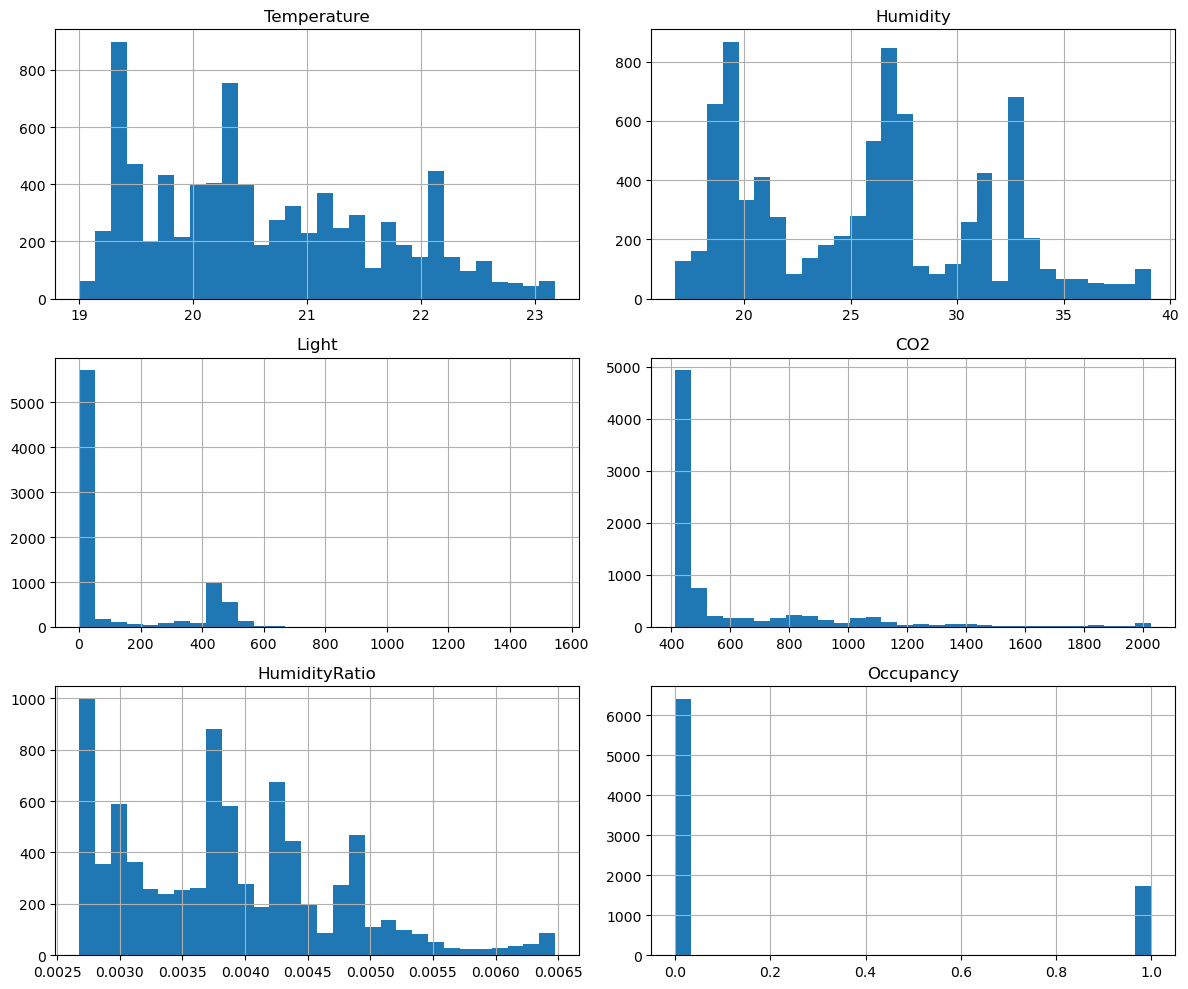

In [50]:
# Plot histograms for numerical features
df_train.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


## Extract categorical features from the datetime feature

In [51]:
# Convert 'date' column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])
df_val['date'] = pd.to_datetime(df_val['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# Extract useful date-time features
for df in [df_train, df_val, df_test]:
    df['hour'] = df['date'].dt.hour
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month

# Display the first few rows to verify the new features
df_train.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour,day_of_week,month
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,17,2,2
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,17,2,2
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,17,2,2
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,17,2,2
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,17,2,2


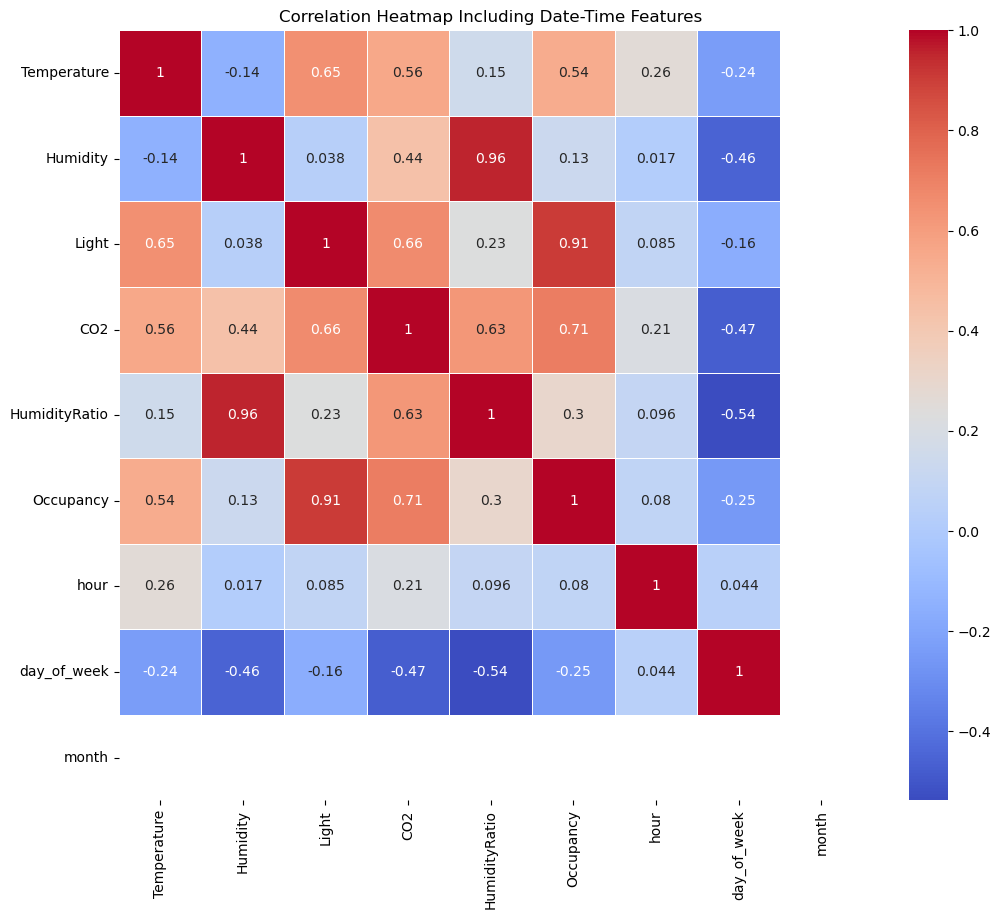

In [52]:

# Correlation heatmap plot to visualize relationships between features
# Drop only the original 'date' column but keep the extracted date-time features
df_train_numeric = df_train.drop(columns=['date'])

# Plot a correlation heatmap including extracted date-time features
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Including Date-Time Features")
plt.show()



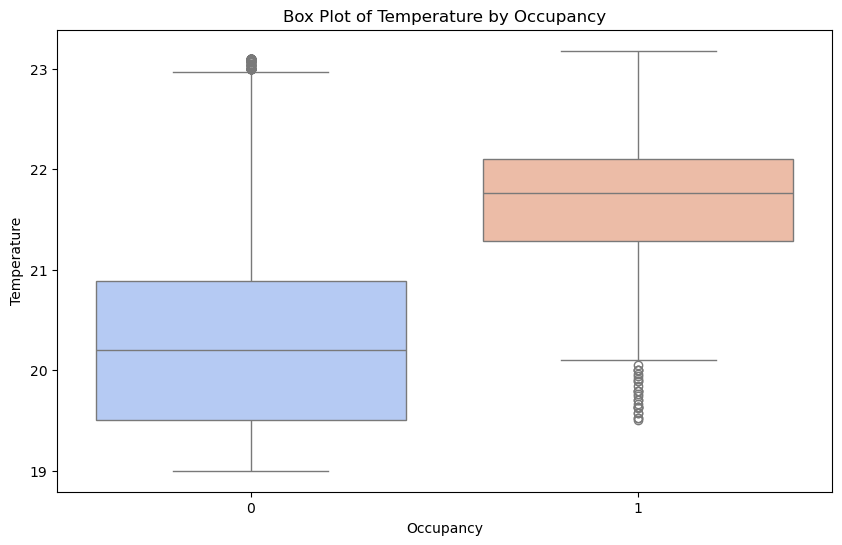

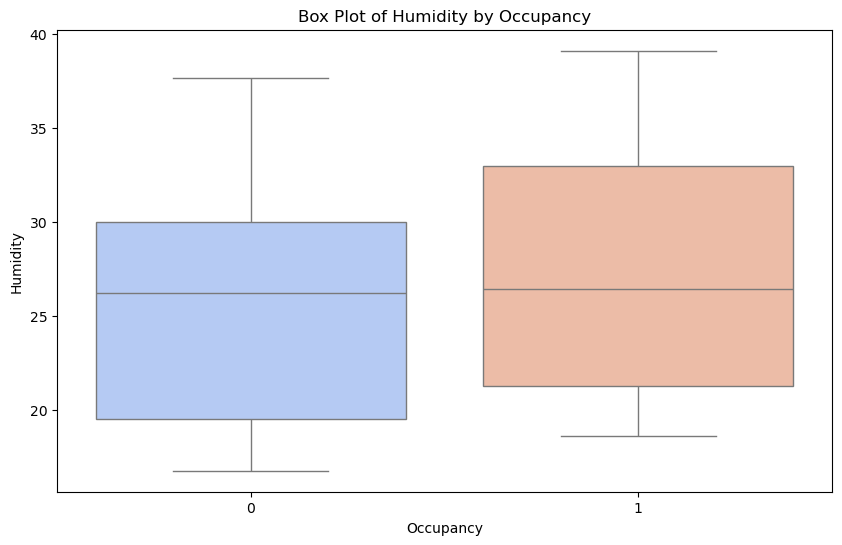

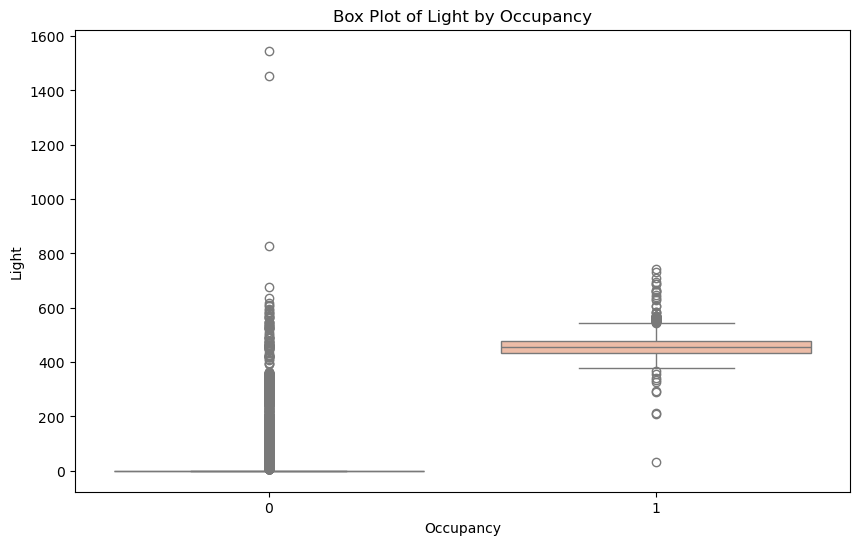

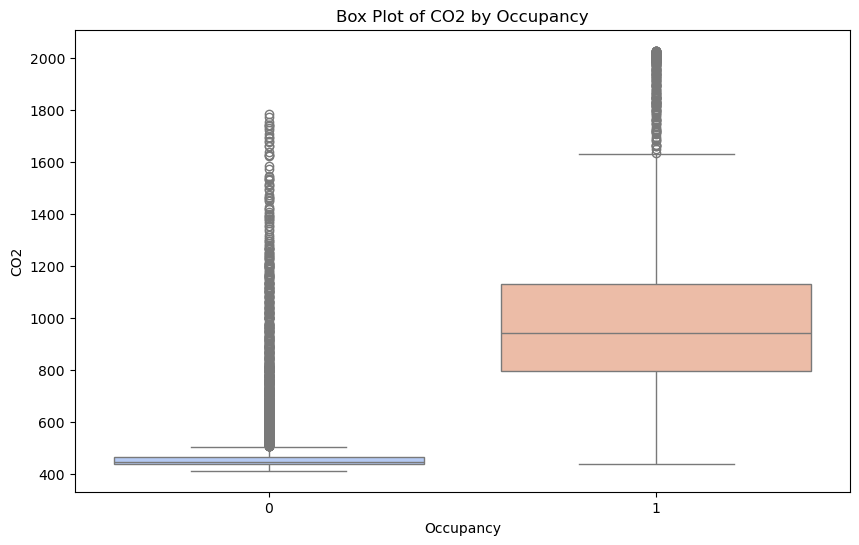

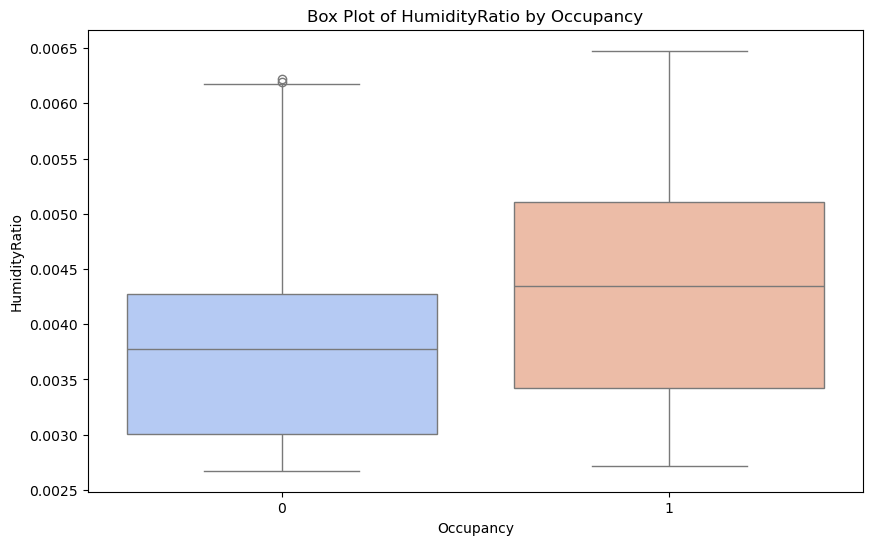

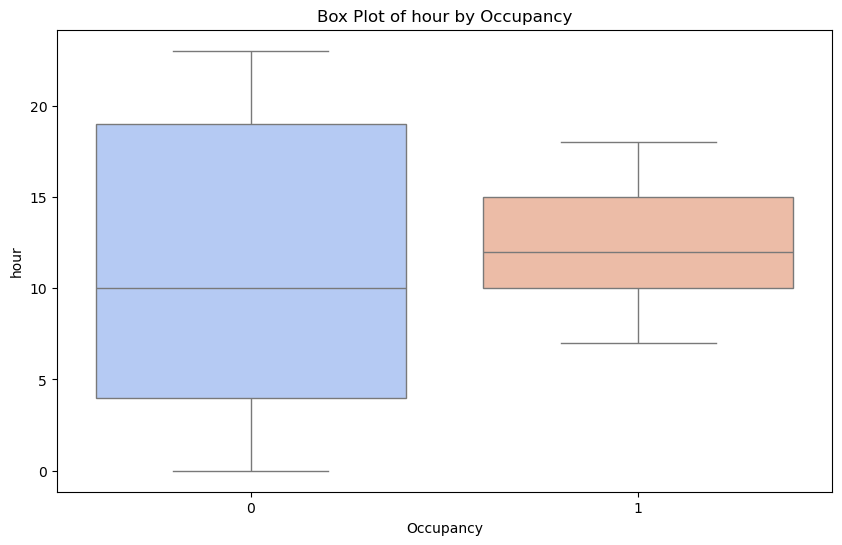

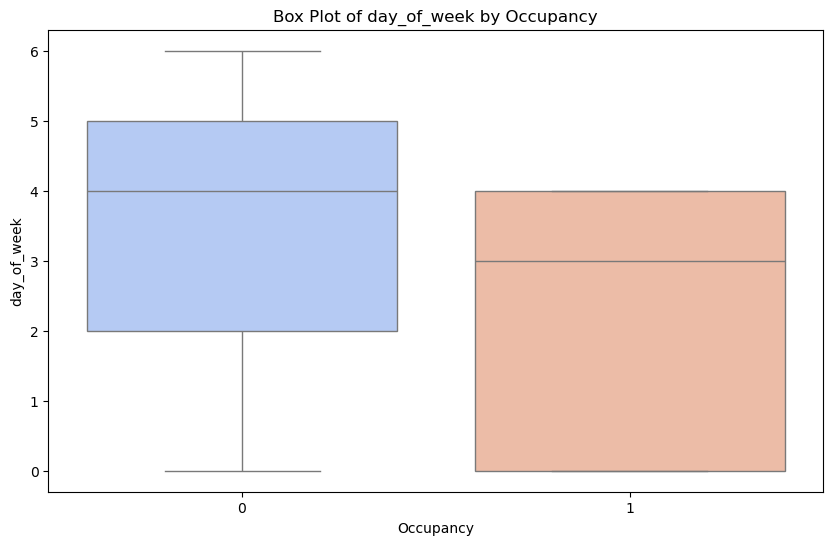

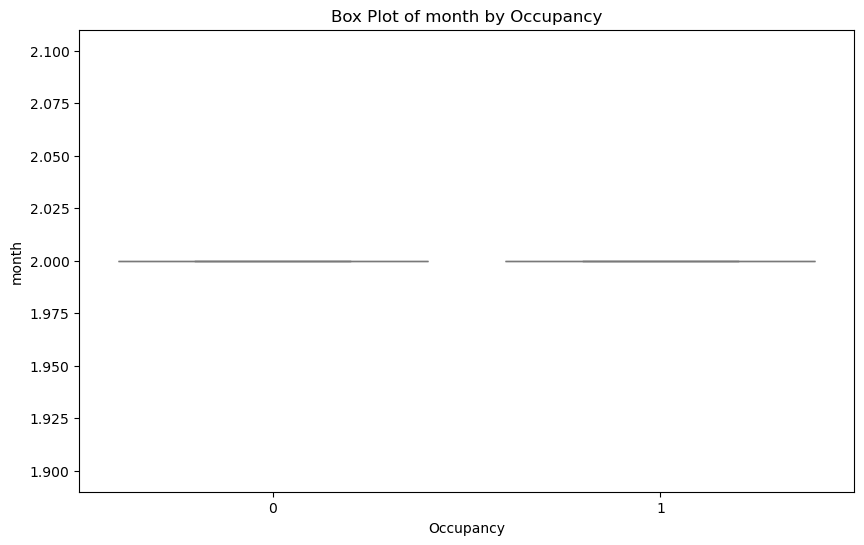

In [53]:
# Generate box plots for each numerical feature to understand distributions between occupied and unoccupied states
for column in df_train_numeric.columns:
    if column != 'Occupancy':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Occupancy', y=column, data=df_train, hue='Occupancy', palette='coolwarm', legend=False)
        plt.title(f"Box Plot of {column} by Occupancy")
        plt.show()


## One-Hot Encode the Extracted Features

In [54]:

# Features to be one-hot encoded
categorical_features = ['hour', 'day_of_week', 'month']

# Apply one-hot encoding to categorical features for training, validation, and test datasets
df_train_encoded = pd.get_dummies(df_train, columns=categorical_features)
df_val_encoded = pd.get_dummies(df_val, columns=categorical_features)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_features)

# Define all possible columns for hours, days, and months
all_hour_columns = ['hour_' + str(i) for i in range(24)]
all_day_columns = ['day_of_week_' + str(i) for i in range(7)]
all_month_columns = ['month_' + str(i) for i in range(1, 13)]
all_possible_columns = all_hour_columns + all_day_columns + all_month_columns

# Add missing columns across datasets if not already present
for df in [df_train_encoded, df_val_encoded, df_test_encoded]:
    for col in all_possible_columns:
        if col not in df.columns:
            df[col] = 0

# Ensure that validation and test datasets have the same columns as the training dataset
df_val_encoded = df_val_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)
df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)

# Display the first few rows to verify encoding
print("Training Data after One-Hot Encoding and Adding Missing Columns:")
display(df_train_encoded.head())



Training Data after One-Hot Encoding and Adding Missing Columns:


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour_0,hour_1,hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0


## Define Preprocessing Functions

### Handle Missing Values:

In [55]:
def handle_missing_values(df):
    """
    Handles missing values in the given DataFrame.
    For numerical features like Temperature, Humidity, Light, etc., we will impute
    by grouping by 'hour' where applicable.
    
    Args:
        df (DataFrame): The DataFrame to handle missing values for.
        
    Returns:
        DataFrame: DataFrame with missing values handled.
    """
    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Only handle columns with missing values
            if df[column].dtype in ['float64', 'int64']:
                # Impute using mean, grouped by 'hour' (context-sensitive imputation)
                df[column] = df.groupby('hour')[column].transform(lambda x: x.fillna(x.mean()))
            else:
                # Fill categorical values (if any) with mode
                df[column].fillna(df[column].mode()[0], inplace=True)

    return df


### Handling Outliers

In [56]:
def handle_outliers(df):
    """
    Detects and handles outliers in the dataset using the IQR method,
    but preserves extreme values if they represent realistic data points.
    
    Args:
        df (DataFrame): The DataFrame to detect and handle outliers for.
        
    Returns:
        DataFrame: DataFrame with outliers selectively handled.
    """
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

    for column in numerical_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Selectively cap outliers based on feature context
        if column in ['Temperature', 'Humidity']:
            # Cap outliers for Temperature and Humidity, which should be stable
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        # Light and CO2 might be more variable and important for prediction, keep those as is.

    return df


### Normalizing Features

In [57]:

def normalize_features(df):
    """
    Normalizes numerical features using MinMax scaling.
    
    Args:
        df (DataFrame): The DataFrame to normalize features for.
        
    Returns:
        DataFrame: DataFrame with normalized numerical features.
    """
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

    scaler = MinMaxScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df


In [58]:
#Combine all preprocessing steps into one function.
def preprocess_data(df):
    df = handle_missing_values(df)
    df = handle_outliers(df)
    df = normalize_features(df)
    return df


## Apply Preprocessing to All Datasets

In [59]:

# Apply the combined preprocessing function to the one-hot encoded datasets
df_train_final = preprocess_data(df_train_encoded)
df_val_final = preprocess_data(df_val_encoded)
df_test_final = preprocess_data(df_test_encoded)

# Drop the original `date` column as it is no longer needed
df_train_final = df_train_final.drop(columns=['date'])
df_val_final = df_val_final.drop(columns=['date'])
df_test_final = df_test_final.drop(columns=['date'])

# Display first few rows of the processed training data to verify
print("Final Preprocessed Training Data:")
display(df_train_final.head())

print("Validation Data after Preprocessing:")
display(df_val_final.head())

print("Test Data after Preprocessing:")
display(df_test_final.head())


Final Preprocessed Training Data:


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour_0,hour_1,hour_2,hour_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,1.000000,0.470533,0.275490,0.190933,0.557318,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.992823,0.470332,0.277754,0.186446,0.554807,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.992823,0.469326,0.275490,0.186136,0.553761,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.992823,0.467315,0.275490,0.182887,0.551669,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.980861,0.467315,0.275490,0.180566,0.547851,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Validation Data after Preprocessing:


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour_0,hour_1,hour_2,hour_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
140,0.831683,0.445132,0.344793,0.330033,0.704212,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,0.835960,0.447053,0.340787,0.341523,0.708308,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,0.838812,0.440651,0.337409,0.351030,0.704689,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.837030,0.429448,0.290912,0.356245,0.694383,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,0.844515,0.437450,0.287877,0.360605,0.705384,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Test Data after Preprocessing:


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour_0,hour_1,hour_2,hour_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,0.579735,0.525565,0.276618,0.342373,0.700223,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.587431,0.518004,0.276618,0.323736,0.695239,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.581659,0.524950,0.274510,0.326092,0.700447,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.581659,0.524950,0.277672,0.329704,0.700447,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.587431,0.525565,0.276618,0.327296,0.703947,1.0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Save Preprocessed Datasets

In [60]:
# Define paths for saving the preprocessed data
train_save_path = "../Dataset/Processed_data/processed_train.csv"
val_save_path = "../Dataset/Processed_data/processed_val.csv"
test_save_path = "../Dataset/Processed_data/processed_test.csv"

# Save the final preprocessed datasets
df_train_final.to_csv(train_save_path, index=False)
df_val_final.to_csv(val_save_path, index=False)
df_test_final.to_csv(test_save_path, index=False)

print("Preprocessed datasets saved successfully.")



Preprocessed datasets saved successfully.
